## Multi-class classification problem

### Data

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms

The data can be downloaded here: https://github.com/zalandoresearch/fashion-mnist (https://arxiv.org/abs/1708.07747).

The images will be stored at **./data/fashion_mnist_images**. This directory must have a folder called train, containing folders for each class (named with the class index), the images will be in these class folders. In addition, the directory must have a folder called test, with the same structure of the train folder.

In [15]:
%cd ..

import os
import urllib.request
from zipfile import ZipFile
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from utils.load_images import create_image_data
from src.model.neural_network import NeuralNetwork
from src.utils.plots import plot_epochs_history

np.set_printoptions(linewidth=200)

### Load the data

In [10]:
# # If you downloaded a zipped file:

# url = ''
# file = './data/fashion_mnist_images.zip'
folder = './data/fashion_mnist_images'

# if not os.path.isfile(file):
#     print(f'Downloading from {url} and saving as {file}')
# urllib.request.urlretrieve(url, file)

# print('Unzipping images')
# with ZipFile(file) as zip_images:
#     zip_images.extractall(folder)

In [11]:
labels = os.listdir(f'{folder}/train')
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [12]:
image_data = cv2.imread(f'{folder}/train/7/0007.png', cv2.IMREAD_UNCHANGED)
print(image_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [13]:
label_description = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
    }

### Split data

In [14]:
 
X, y, X_test, y_test = create_image_data(folder)


In [16]:
# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

### Fit the model

In [ ]:
input_shape = X_train.shape[1]
output_n_neurons = max(y_train) + 1 # if y is OHE use y.shape[1]
start_params = dict(input_shape = input_shape, output_n_neurons = output_n_neurons, output_activation='softmax', accuracy= 'categorical')

model = NeuralNetwork(**start_params)

# Add layers
params = dict(loss = 'categorical_cross_entropy', optimizer = 'adam', 
        epochs = 20, batch_size = 128,        
        n_layers = 5, n_neurons = 100, learning_rate = 0.0005,
        decay = 5e-5)

model.set_params(**params)

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), print_every_n_steps=300)

### Plot accumulated epoch losses and validation losses

The validation loss (in **orange**) usually starts smaller than the epoch losses because the values used to calculate the epoch loss are computed before the parameter update and the validation loss is computed after all parameter updates of the epoch.

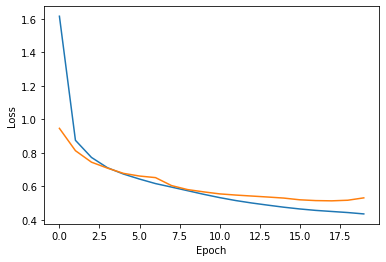

In [21]:
plot_epochs_history([model.accumulated_epoch_losses, model.validation_epoch_losses], 'Loss')

### Predictions

In [24]:
model.predict(X, type='proba')

array([[5.84972417e-15, 9.99186316e-01, 1.17323250e-11, ..., 9.53662866e-54, 1.84015769e-09, 3.98572609e-46],
       [4.98556693e-04, 1.11172981e-06, 9.89900103e-09, ..., 4.31281234e-05, 9.99236766e-01, 4.75439792e-07],
       [1.37143801e-21, 9.99973115e-01, 1.18194875e-16, ..., 1.97120543e-78, 1.49947590e-13, 1.96739789e-67],
       ...,
       [3.78880139e-05, 2.49688527e-09, 3.50138974e-11, ..., 4.44245121e-07, 9.99960694e-01, 2.79861453e-10],
       [6.10785282e-17, 9.99705888e-01, 3.76807627e-13, ..., 3.95207539e-61, 1.10432734e-10, 1.69201712e-52],
       [4.78334938e-01, 8.52742705e-05, 1.62931455e-02, ..., 2.72742356e-17, 3.09519936e-03, 7.59284924e-16]])

In [25]:
model.predict(X, type='classes')

array([1, 8, 1, ..., 8, 1, 0], dtype=int64)

### Save the model

In [87]:
model.save_model('fashion_mnist.model')

### Load and evaluate

In [88]:
model = NeuralNetwork.load('fashion_mnist.model')

model.evaluate(X_test, y_test)

0-> Acc: 0.845 Loss: 0.456


(0.4561039253581247, 0.845)